In [37]:
import pandas as pd
import ast

In [38]:
data = pd.read_csv('./data/Destination_202412062130.csv')

In [39]:
data.head()

,item_id,place_name,description,gambar,category,city,price,rating_avg,rating_count,latitude,longitude,coordinate
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,https://storage.googleapis.com/destinasyikfile...,Budaya,Jakarta,20000,0.00000000,0,-6.17539240,106.82715280,"{'lat': -6.1753924, 'lng': 106.8271528}"
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",https://storage.googleapis.com/destinasyikfile...,Budaya,Jakarta,0,0.00000000,0,-6.13764480,106.81712450,"{'lat': -6.137644799999999, 'lng': 106.8171245}"
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,https://storage.googleapis.com/destinasyikfile...,Taman Hiburan,Jakarta,270000,0.00000000,0,-6.12531240,106.83353770,"{'lat': -6.125312399999999, 'lng': 106.8335377}"
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,https://storage.googleapis.com/destinasyikfile...,Taman Hiburan,Jakarta,10000,0.00000000,0,-6.30244590,106.89515590,"{'lat': -6.302445899999999, 'lng': 106.8951559}"
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,https://storage.googleapis.com/destinasyikfile...,Taman Hiburan,Jakarta,94000,0.00000000,0,-6.12419000,106.83913400,"{'lat': -6.12419, 'lng': 106.839134}"


In [40]:
data.shape

(513, 12)

In [41]:
data.isnull().sum()

item_id         0
place_name      0
description     0
gambar          0
category        0
city            0
price           0
rating_avg      1
rating_count    0
latitude        0
longitude       0
coordinate      1
dtype: int64

In [42]:
data.dropna(inplace=True)

In [43]:
# pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [44]:
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except Exception as e:
        print(f"Error evaluating: {x} -> {e}")

data['coordinateX'] = data['coordinate'].apply(safe_eval)

# Ambil nilai latitude dan longitude
data['latitude'] = data['coordinateX'].apply(lambda x: x['lat'] if isinstance(x, dict) else None)
data['longitude'] = data['coordinateX'].apply(lambda x: x['lng'] if isinstance(x, dict) else None)

In [45]:
data.head()

,item_id,place_name,description,gambar,category,city,price,rating_avg,rating_count,latitude,longitude,coordinate,coordinateX
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,https://storage.googleapis.com/destinasyikfile...,Budaya,Jakarta,20000,0.00000000,0,-6.17539240,106.82715280,"{'lat': -6.1753924, 'lng': 106.8271528}","{'lat': -6.1753924, 'lng': 106.8271528}"
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",https://storage.googleapis.com/destinasyikfile...,Budaya,Jakarta,0,0.00000000,0,-6.13764480,106.81712450,"{'lat': -6.137644799999999, 'lng': 106.8171245}","{'lat': -6.137644799999999, 'lng': 106.8171245}"
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,https://storage.googleapis.com/destinasyikfile...,Taman Hiburan,Jakarta,270000,0.00000000,0,-6.12531240,106.83353770,"{'lat': -6.125312399999999, 'lng': 106.8335377}","{'lat': -6.125312399999999, 'lng': 106.8335377}"
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,https://storage.googleapis.com/destinasyikfile...,Taman Hiburan,Jakarta,10000,0.00000000,0,-6.30244590,106.89515590,"{'lat': -6.302445899999999, 'lng': 106.8951559}","{'lat': -6.302445899999999, 'lng': 106.8951559}"
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,https://storage.googleapis.com/destinasyikfile...,Taman Hiburan,Jakarta,94000,0.00000000,0,-6.12419000,106.83913400,"{'lat': -6.12419, 'lng': 106.839134}","{'lat': -6.12419, 'lng': 106.839134}"


In [47]:
data = data.drop(columns=['coordinateX'])

In [51]:
data.isnull().sum()

item_id          0
place_name       0
description      0
gambar           0
category         0
city             0
price            0
rating_avg       0
rating_count     0
latitude        75
longitude       75
coordinate       0
dtype: int64

In [48]:
data.to_csv('./data/destinasiDB.csv', index=False)

In [ ]:
-6.194436852468924, 106.82292332314661

In [21]:
db = pd.read_csv('./data/destinasiWisata.csv')

In [22]:
db.head()

,place_name,description,category,city,price,rating_avg,coordinate,latitude,longitude,rating_count,distance_km
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000.0,0,"{'lat': -6.1753924, 'lng': 106.8271528}",-61753924.0,1.068272e+09,0,3047.009665
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0.0,0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-61376448.0,1.068171e+09,0,14795.470616
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000.0,0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-61253124.0,1.068335e+09,0,8240.165203
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000.0,0,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-63024459.0,1.068952e+09,0,7918.929941
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000.0,0,"{'lat': -6.12419, 'lng': 106.839134}",-612419.0,1.068391e+08,0,16127.056024


In [23]:
db['rating_avg'] = db['rating_avg'].astype(float)

In [24]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   place_name    512 non-null    object 
 1   description   512 non-null    object 
 2   category      512 non-null    object 
 3   city          512 non-null    object 
 4   price         512 non-null    float64
 5   rating_avg    512 non-null    float64
 6   coordinate    512 non-null    object 
 7   latitude      512 non-null    float64
 8   longitude     512 non-null    float64
 9   rating_count  512 non-null    int64  
 10  distance_km   512 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 44.1+ KB


In [25]:
db.drop(columns='distance_km', inplace=True)

In [26]:
db.columns

Index(['place_name', 'description', 'category', 'city', 'price', 'rating_avg',
       'coordinate', 'latitude', 'longitude', 'rating_count'],
      dtype='object')

In [27]:
db['item_id'] = db.index + 1


In [28]:
db.to_csv('./data/destinasiDB.csv', index=False)

In [32]:
db

,place_name,description,category,city,price,rating_avg,coordinate,latitude,longitude,rating_count,item_id
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000.0,0.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392e+07,1.068272e+09,0,1
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0.0,0.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645e+07,1.068171e+09,0,2
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000.0,0.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312e+07,1.068335e+09,0,3
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000.0,0.0,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446e+07,1.068952e+09,0,4
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000.0,0.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190e+05,1.068391e+08,0,5
...,...,...,...,...,...,...,...,...,...,...,...
507,Teras Sawah Tegalalang,"Uniknya Tegallalang Rice Terrace di Bali ini, ...",Agrowisata,Bali,10000.0,0.0,"-8.433891714602193, 115.27918179571854",-8.433892e+00,1.152792e+02,0,508
508,Tirta Gangga,Ada tiga hal utama yang ada di taman Tirta Gan...,Religius,Bali,25000.0,0.0,"-8.412071345387545, 115.58728116872855",-8.412071e+00,1.155873e+02,0,509
509,Waterbom Bali,Waterbom merupakan sebuah oase di jantung kawa...,Rekreasi,Bali,289000.0,0.0,"-8.72828817001415, 115.16934211106027",-8.728288e+00,1.151693e+02,0,510
510,Alas Harum Agro Tourism,Alas Harum Bali merupakan destinasi wisata yan...,Agrowisata,Bali,10000.0,0.0,"-8.43969896624251, 115.28060749756382",-8.439699e+00,1.152806e+02,0,511


In [29]:
db.shape

(512, 11)

In [15]:
# # Data review dengan distribusi rating natural
# review_data = pd.DataFrame({
#     'user_id': np.random.randint(1, n_users + 1, 10000),
#     'item_id': np.random.randint(1, n_items + 1, 10000),
#     'rating': np.random.choice([1, 2, 3, 4, 5], size=10000, p=[0.1, 0.1, 0.2, 0.3, 0.3])
# }).drop_duplicates(subset=['user_id', 'item_id'])

# # Daftar popular items
# popular_items = np.random.choice(range(1, n_items + 1), size=100, replace=False)

# # Data bookmark
# bookmark_data = pd.DataFrame({
#     'user_id': np.random.randint(1, n_users + 1, 6000),
#     'item_id': np.random.choice(popular_items, 6000),
# }).drop_duplicates(subset=['user_id', 'item_id'])
# bookmark_data['is_bookmarked'] = np.random.choice([0, 1], size=len(bookmark_data), p=[0.2, 0.8])

# # Data like
# like_data = pd.DataFrame({
#     'user_id': np.random.randint(1, n_users + 1, 6000),
#     'item_id': np.random.choice(popular_items, 6000),
# }).drop_duplicates(subset=['user_id', 'item_id'])
# like_data['is_liked'] = np.random.choice([0, 1], size=len(like_data), p=[0.3, 0.7])

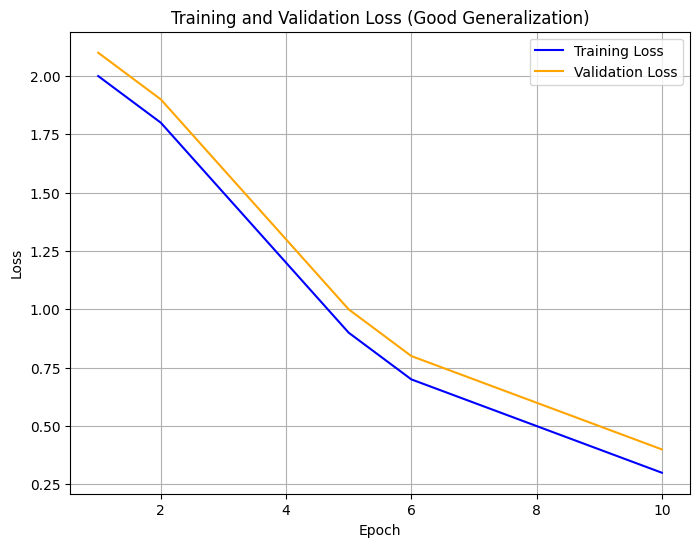

In [16]:
import matplotlib.pyplot as plt

# Simulate training and validation loss data for a model that generalizes well
epochs = range(1, 11)
train_loss = [2.0, 1.8, 1.5, 1.2, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3]
val_loss = [2.1, 1.9, 1.6, 1.3, 1.0, 0.8, 0.7, 0.6, 0.5, 0.4]

# Plot the losses
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
plt.title("Training and Validation Loss (Good Generalization)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

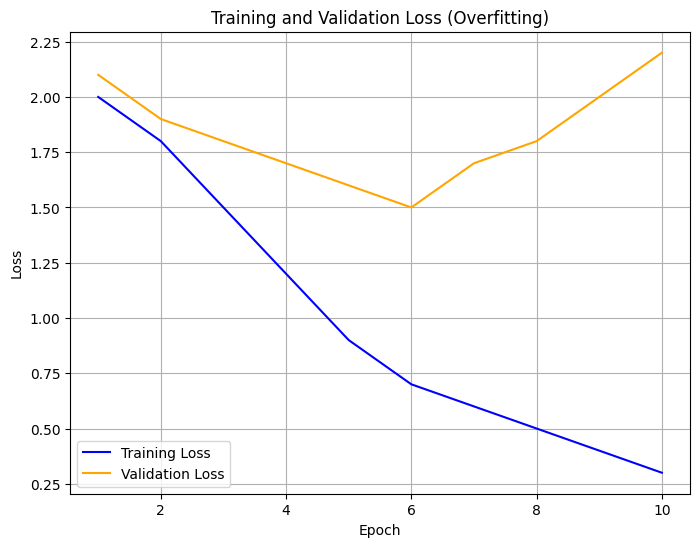

In [17]:
# Simulate a model that overfits
train_loss = [2.0, 1.8, 1.5, 1.2, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3]
val_loss = [2.1, 1.9, 1.8, 1.7, 1.6, 1.5, 1.7, 1.8, 2.0, 2.2]

# Plot the losses
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
plt.title("Training and Validation Loss (Overfitting)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


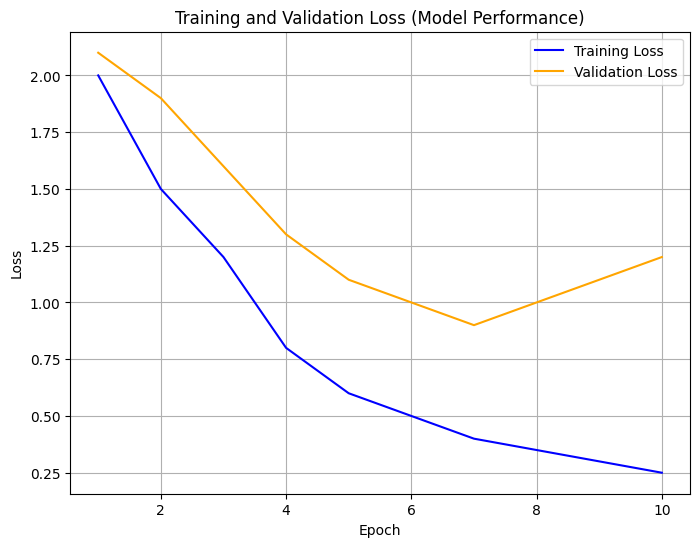

In [18]:
import matplotlib.pyplot as plt

# Epochs and loss values based on your model's performance
epochs = range(1, 11)
train_loss = [2.0, 1.5, 1.2, 0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.25]  # Training loss example
val_loss = [2.1, 1.9, 1.6, 1.3, 1.1, 1.0, 0.9, 1.0, 1.1, 1.2]        # Validation loss example

# Plot the losses
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
plt.title("Training and Validation Loss (Model Performance)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Muat model yang dilatih
model = load_model('./models/colaborative.h5', custom_objects={'mse': 'mean_squared_error'})

# Berikan optimizer dummy hanya untuk penyimpanan ulang
model.compile(optimizer=Adam(), loss=None)

# Simpan ulang model dalam format HDF5
model.save('./models/finalModel.h5')

print("Model berhasil disimpan tanpa perlu training ulang.")


Model berhasil disimpan tanpa perlu training ulang.
